In [2]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("cian_flat_rent_1_50_moskva_12_May_2024_20_22_32_951165.csv")

In [54]:
import pandas as pd

# Replace 'data.csv' with the actual path to your CSV file
df = pd.read_csv('cian_flat_rent_1_50_moskva_12_May_2024_20_22_32_951165.csv', sep=';', header=0, names=['author', 'author_type', 'url', 'location', 'deal_type', 'accommodation_type', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price_per_months','comissions','district','street','house_number','underground'])


In [55]:
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_months,comissions,district,street,house_number,underground
0,Циан х ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/300913633/,Москва,rent,flat,12,17,3,72.7,88000,0,Черемушки,Наметкина,11,Новые Черёмушки
1,АЛЬФА,real_estate_agent,https://www.cian.ru/rent/flat/301061437/,Москва,rent,flat,24,25,2,65.0,110000,0,Обручевский,Ленинский проспект,105к3,Новаторская
2,EMPIRE HOME,real_estate_agent,https://www.cian.ru/rent/flat/301599048/,Москва,rent,flat,1,6,1,35.0,33000,0,NaN,Жемчужная,1к16,Рассказовка
3,ЦАН,real_estate_agent,https://www.cian.ru/rent/flat/301067187/,Москва,rent,flat,24,25,2,66.0,110000,0,Обручевский,Ленинский проспект,105к3,Новаторская
4,ID 18835544,official_representative,https://www.cian.ru/rent/flat/278216280/,Москва,rent,flat,7,12,2,90.0,1000000,0,Тверской,Охотный Ряд,2,Охотный ряд


In [56]:
df.shape

(1376, 16)

### проверим на наличие дубликатов

In [57]:
df_no_dup = df.drop_duplicates()

In [58]:
df_no_dup.shape #осталось наблюдений(дубликатов нет)

(1376, 16)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376 entries, 0 to 1375
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   author              1376 non-null   object 
 1   author_type         1376 non-null   object 
 2   url                 1376 non-null   object 
 3   location            1376 non-null   object 
 4   deal_type           1376 non-null   object 
 5   accommodation_type  1376 non-null   object 
 6   floor               1376 non-null   int64  
 7   floors_count        1376 non-null   int64  
 8   rooms_count         1376 non-null   int64  
 9   total_meters        1376 non-null   float64
 10  price_per_months    1376 non-null   int64  
 11  comissions          1376 non-null   int64  
 12  district            1250 non-null   object 
 13  street              1353 non-null   object 
 14  house_number        1374 non-null   object 
 15  underground         1365 non-null   object 
dtypes: flo

## Посмотрим на начальное распределение цены 

In [60]:
dfa = df.dropna()

In [61]:
dfa.shape #видим, что строчек с пропусками было не очень много относительно всех данных, поэтому ими можно пренебречь

(1229, 16)

## визуально рассмотрим распределение целевой переменной

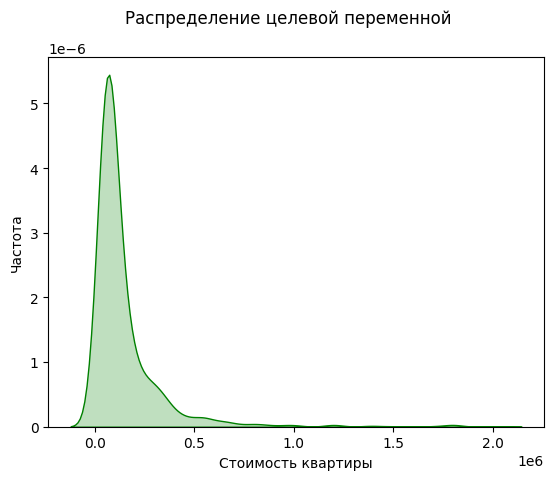

In [62]:
sns.kdeplot(dfa['price_per_months'] , fill = True, color = 'green')

plt.suptitle('Распределение целевой переменной')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Частота')
plt.show() 

### видим, что в правом хвосте много выбросов, поработаем с ними

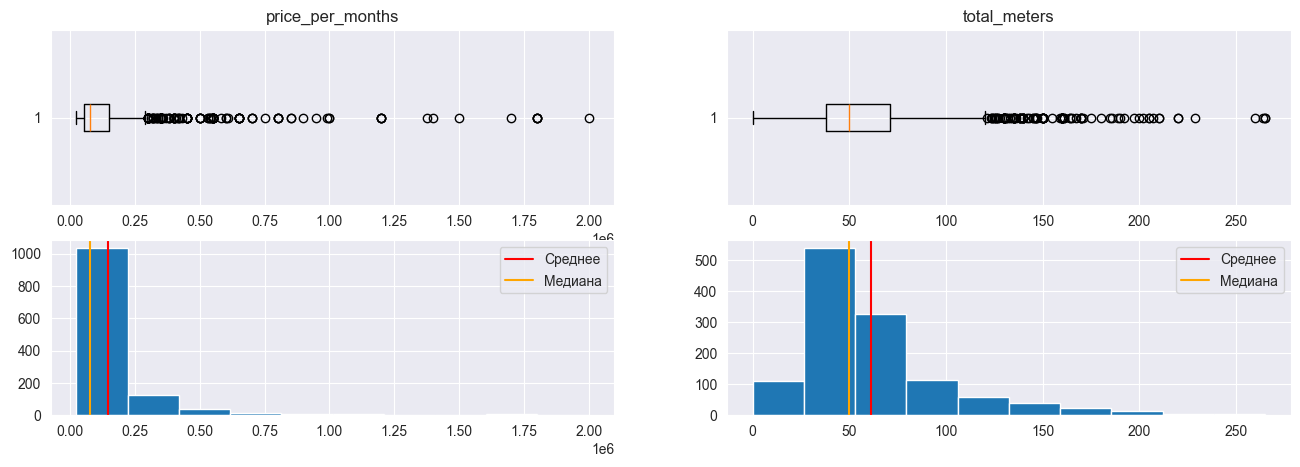

In [73]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(16, 5))

lst = ['price_per_months', 'total_meters']

for i in range(len(lst)):
    ax[0][i].set_title(lst[i])
    ax[0][i].boxplot(dfa[lst[i]], vert = False);

    ax[1][i].hist(dfa[lst[i]]);
    ax[1][i].axvline(dfa[lst[i]].mean(), color = 'red', label = 'Среднее')
    ax[1][i].axvline(dfa[lst[i]].median(), color = 'orange', label = 'Медиана')
    ax[1][i].legend()

#### найдем границы того, что будем считать выбросами

In [67]:
q1 = dfa['price_per_months'].quantile(0.25)
q3 = dfa['price_per_months'].quantile(0.75)
iqr = q3-q1
left = q1 - 1.5*iqr
right = q3 + 1.5*iqr
left, right 

(-87500.0, 292500.0)

#### по результату видно, что слева выбросов нет, в то время как справа их довольно много. Делаем фильтрацию и оставляем данные без выбросов:

In [72]:
df_clean = dfa[(dfa['price_per_months']>=left) & (dfa['price_per_months']<=right)]
df_clean

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_months,comissions,district,street,house_number,underground
0,Циан х ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/300913633/,Москва,rent,flat,12,17,3,72.7,88000,0,Черемушки,Наметкина,11,Новые Черёмушки
1,АЛЬФА,real_estate_agent,https://www.cian.ru/rent/flat/301061437/,Москва,rent,flat,24,25,2,65.0,110000,0,Обручевский,Ленинский проспект,105к3,Новаторская
3,ЦАН,real_estate_agent,https://www.cian.ru/rent/flat/301067187/,Москва,rent,flat,24,25,2,66.0,110000,0,Обручевский,Ленинский проспект,105к3,Новаторская
6,ДОМ.РФ Аренда,real_estate_agent,https://www.cian.ru/rent/flat/301787649/,Москва,rent,flat,15,15,-1,45.0,105990,0,Хорошевский,Ходынский бульвар,2,ЦСКА
7,Циан х ПИК-Аренда,real_estate_agent,https://www.cian.ru/rent/flat/301225189/,Москва,rent,flat,10,33,1,35.9,80900,0,Головинский,Кронштадтский бульвар,8к1,Водный стадион
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1371,Александр Михайлов,realtor,https://www.cian.ru/rent/flat/300893858/,Москва,rent,flat,3,24,2,62.2,80000,0,Нижегородский,Новохохловская,15к1,Новохохловская
1372,EMPIRE HOME,real_estate_agent,https://www.cian.ru/rent/flat/301645040/,Москва,rent,flat,14,17,2,56.5,82000,0,Ростокино,Сельскохозяйственная,18К3,Ботанический сад
1373,Ольга Линькова,realtor,https://www.cian.ru/rent/flat/274090434/,Москва,rent,flat,3,5,2,50.0,85000,0,Гольяново,Амурская,1Ак2,Черкизовская
1374,ЭЛЬНОВА,real_estate_agent,https://www.cian.ru/rent/flat/301833568/,Москва,rent,flat,9,9,3,83.0,85000,0,Сокольники,3-я Рыбинская,1,Сокольники


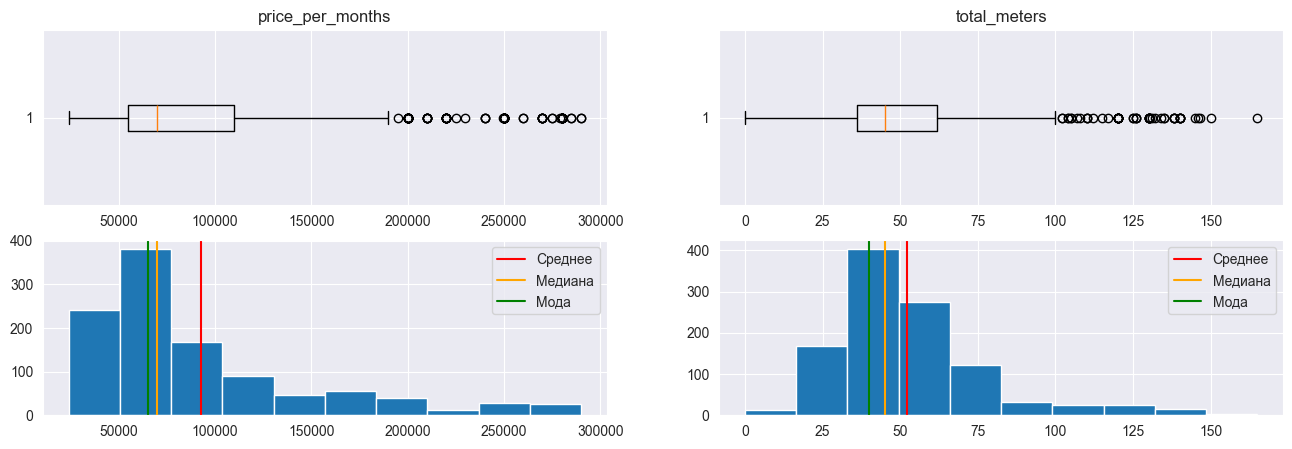

In [79]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(16, 5))

lst = ['price_per_months', 'total_meters']

for i in range(len(lst)):
    ax[0][i].set_title(lst[i])
    ax[0][i].boxplot(df_clean[lst[i]], vert = False);

    ax[1][i].hist(df_clean[lst[i]]);
    ax[1][i].axvline(df_clean[lst[i]].mean(), color = 'red', label = 'Среднее')
    ax[1][i].axvline(df_clean[lst[i]].median(), color = 'orange', label = 'Медиана')
    ax[1][i].axvline(df_clean[lst[i]].mode().iloc[0], color = 'green', label = 'Мода')

    ax[1][i].legend()

#### стало лучше

### посмотрим на меры центральной тенденции

In [46]:
df['price_per_months'].mean()

137010.38590116278

In [47]:
df['price_per_months'].median()

70000.0

In [48]:
df['price_per_months'].mode()

0    65000
Name: price_per_months, dtype: int64

#### Видим как визуально, так и по цифрам, что у нас мода < медиана < среднее арифметическое, значит, у нас унимодальное скошенное вправо распределение. Унимодальное оно, так как пик графика частоты(как это заметно) один

## Корелляционный анализ

In [80]:
df_clean[['price_per_months', 'floors_count', 'rooms_count','total_meters']].corr()

,price_per_months,floors_count,rooms_count,total_meters
price_per_months,1.000000,0.296667,0.471368,0.697272
floors_count,0.296667,1.000000,0.073188,0.095572
rooms_count,0.471368,0.073188,1.000000,0.714623
total_meters,0.697272,0.095572,0.714623,1.000000


<Axes: >

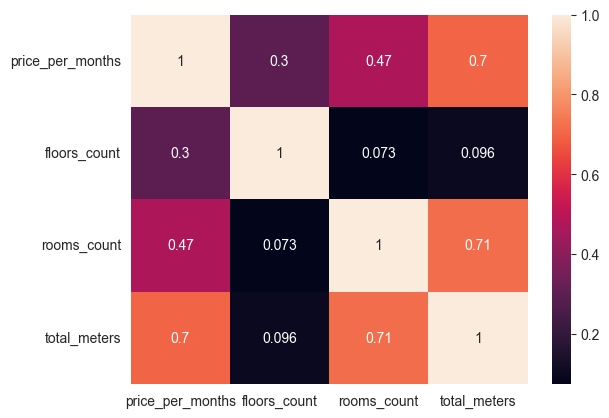

In [81]:
sns.heatmap(df_clean[['price_per_months', 'floors_count', 'rooms_count','total_meters']].corr(), annot = True)

#### Коэффициент корреляции Пирсона (r) позволяет оценить силу и направление линейной взаимосвязи между числовыми непрерывными данными, хоть количество комнат и этажей не являются непрерывными, они, все таки также могут быть оценены(в данном случае) с помощью r. Если корреляция цены с комнатами и с метрами вполне очевидна, то с этажами она слабая, но все же, есть. Скорее всего за счет того, высокие дома преимущественно новые, поэтому и квартиры в них дороже.